In [1]:
import os
import zipfile

zip_path='dataset/rockpaperscissor.zip'
data_file=zipfile.ZipFile(zip_path,'r')
data_file.extractall('dataset/rockpaperscissor/')
data_file.close()
print("extracted files")

extracted files


In [3]:
import os
files=os.listdir('dataset/rockpaperscissor')
print('Number of files '+str(len(files)))

Number of files 5


In [4]:
#three separte folder 
rock_dir = os.path.join('dataset/rockpaperscissor/rock')
paper_dir = os.path.join('dataset/rockpaperscissor/paper')
scissors_dir = os.path.join('dataset/rockpaperscissor/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
#list one dim rock_files: 1-10
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 726
total training paper images: 712
total training scissors images: 750
['00nKV8oHuTGi20gq.png', '01dM3ewPIsnBICu1.png', '02vG75hQW9Vp4oTl.png', '0bioBZYFCXqJIulm.png', '0NDYNEoDui7o64gU.png', '0OEXfEooCXlljaEl.png', '0P6uxM8Vr1DwySHe.png', '19H63c0MWD56EWNq.png', '1BqjHe5igJAgUjiN.png', '1COBZEE1ALiJIivQ.png']
['04l5I8TqdzF9WDMJ.png', '0a3UtNzl5Ll3sq8K.png', '0cb6cVL8pkfi4wF6.png', '0eqArS2GgsBeqgSn.png', '0Og76sl5CJhbxWWx.png', '0RA9rcrv8iVvuDDU.png', '0t08v9bAaA0mXGCQ.png', '0Uomd0HvOB33m47I.png', '0vugygEjxQJPr9yz.png', '0zKU6wEhT2cDe9j0.png']
['0657zSfiTYzP2jrl.png', '0CSaM2vL2cWX6Cay.png', '0ePX1wuCc3et7leL.png', '0Flw60Z2MAWWKn6S.png', '0Ug54ifXRqqlZS2Z.png', '0zoQAmDFXehOZsAp.png', '138Tx9KlEfheT3uB.png', '17HZDUFSVPxcar99.png', '1CXgK9fgGdSRggD9.png', '1i1dlQrE6JnhYXE4.png']


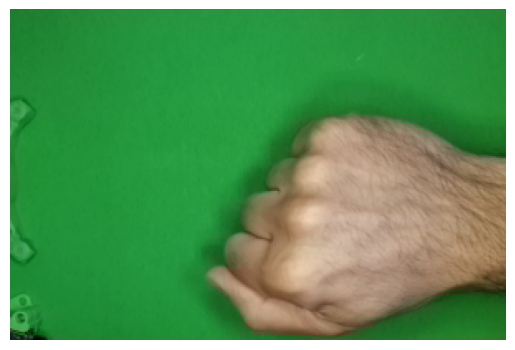

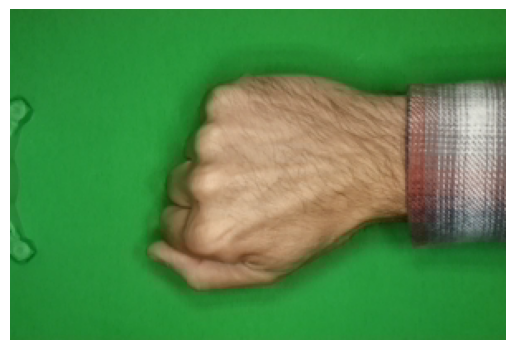

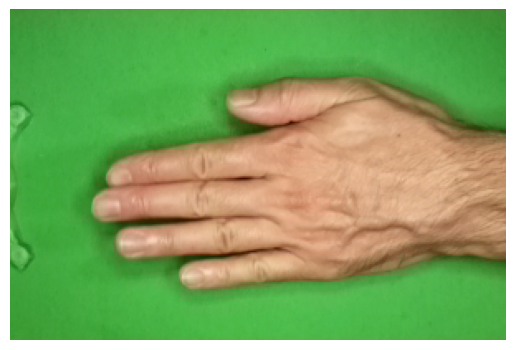

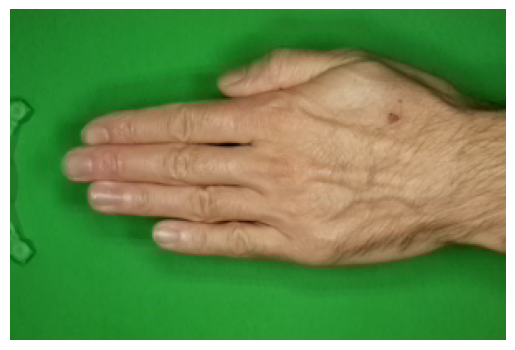

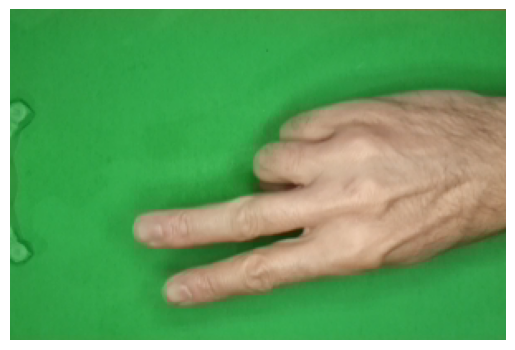

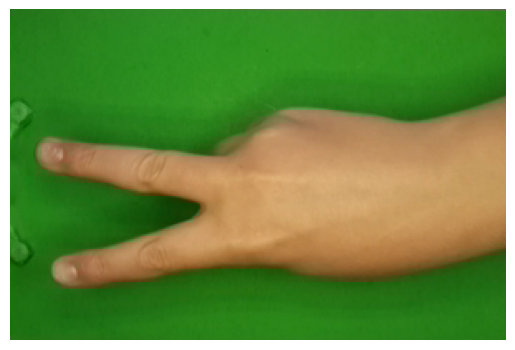

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
#move rock, paper, scissors - three folders into rps
#do it manually

In [7]:
import tensorflow as tf
import keras.preprocessing
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "dataset/rockpaperscissor/rps/"

#Data augmentation
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "dataset/rockpaperscissor/rps-cv-images/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

model.save("rps_model.h5")


Found 2188 images belonging to 3 classes.
Found 2188 images belonging to 3 classes.


C:\Users\Dell\AppData\Local\Temp\ipykernel_9444\3278911500.py:58: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)


Epoch 1/25
69/69 [==============================] - 169s 2s/step - loss: 1.1167 - accuracy: 0.3140 - val_loss: 1.0971 - val_accuracy: 0.5411
Epoch 2/25
69/69 [==============================] - 118s 2s/step - loss: 1.0823 - accuracy: 0.4150 - val_loss: 0.8793 - val_accuracy: 0.5320
Epoch 3/25
69/69 [==============================] - 112s 2s/step - loss: 0.8296 - accuracy: 0.6376 - val_loss: 0.4696 - val_accuracy: 0.7363
Epoch 4/25
69/69 [==============================] - 108s 2s/step - loss: 0.6430 - accuracy: 0.7308 - val_loss: 0.2987 - val_accuracy: 0.9305
Epoch 5/25
69/69 [==============================] - 113s 2s/step - loss: 0.5590 - accuracy: 0.7724 - val_loss: 0.2045 - val_accuracy: 0.9474
Epoch 6/25
69/69 [==============================] - 107s 2s/step - loss: 0.4634 - accuracy: 0.8167 - val_loss: 0.1850 - val_accuracy: 0.9575
Epoch 7/25
69/69 [==============================] - 101s 1s/step - loss: 0.3550 - accuracy: 0.8665 - val_loss: 0.2974 - val_accuracy: 0.9264
Epoch 8/25
69

In [8]:
#three separte folder 
rock_dir = os.path.join('dataset/rockpaperscissor/rps/rock')
paper_dir = os.path.join('dataset/rockpaperscissor/rps/paper')
scissors_dir = os.path.join('dataset/rockpaperscissor/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
#list one dim rock_files: 1-10
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])


total training rock images: 726
total training paper images: 712
total training scissors images: 750
['00nKV8oHuTGi20gq.png', '01dM3ewPIsnBICu1.png', '02vG75hQW9Vp4oTl.png', '0bioBZYFCXqJIulm.png', '0NDYNEoDui7o64gU.png', '0OEXfEooCXlljaEl.png', '0P6uxM8Vr1DwySHe.png', '19H63c0MWD56EWNq.png', '1BqjHe5igJAgUjiN.png', '1COBZEE1ALiJIivQ.png']
['04l5I8TqdzF9WDMJ.png', '0a3UtNzl5Ll3sq8K.png', '0cb6cVL8pkfi4wF6.png', '0eqArS2GgsBeqgSn.png', '0Og76sl5CJhbxWWx.png', '0RA9rcrv8iVvuDDU.png', '0t08v9bAaA0mXGCQ.png', '0Uomd0HvOB33m47I.png', '0vugygEjxQJPr9yz.png', '0zKU6wEhT2cDe9j0.png']
['0657zSfiTYzP2jrl.png', '0CSaM2vL2cWX6Cay.png', '0ePX1wuCc3et7leL.png', '0Flw60Z2MAWWKn6S.png', '0Ug54ifXRqqlZS2Z.png', '0zoQAmDFXehOZsAp.png', '138Tx9KlEfheT3uB.png', '17HZDUFSVPxcar99.png', '1CXgK9fgGdSRggD9.png', '1i1dlQrE6JnhYXE4.png']


In [10]:
import tensorflow as tf
import keras.preprocessing
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "dataset/rockpaperscissor/rps/"

#Data augmentation
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "dataset/rockpaperscissor/rps-cv-images/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

model.save("rps_model.h5")


Found 2188 images belonging to 3 classes.
Found 2188 images belonging to 3 classes.


C:\Users\Dell\AppData\Local\Temp\ipykernel_9444\3278911500.py:58: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)


Epoch 1/25
69/69 [==============================] - 118s 2s/step - loss: 1.0804 - accuracy: 0.4100 - val_loss: 0.7021 - val_accuracy: 0.6673
Epoch 2/25
69/69 [==============================] - 103s 1s/step - loss: 0.8042 - accuracy: 0.6417 - val_loss: 0.4850 - val_accuracy: 0.8327
Epoch 3/25
69/69 [==============================] - 110s 2s/step - loss: 0.6060 - accuracy: 0.7500 - val_loss: 0.2377 - val_accuracy: 0.9506
Epoch 4/25
69/69 [==============================] - 101s 1s/step - loss: 0.4846 - accuracy: 0.8053 - val_loss: 0.7446 - val_accuracy: 0.6883
Epoch 5/25
69/69 [==============================] - 99s 1s/step - loss: 0.4043 - accuracy: 0.8519 - val_loss: 1.4741 - val_accuracy: 0.4644
Epoch 6/25
69/69 [==============================] - 98s 1s/step - loss: 0.3813 - accuracy: 0.8729 - val_loss: 0.1694 - val_accuracy: 0.9662
Epoch 7/25
69/69 [==============================] - 98s 1s/step - loss: 0.2416 - accuracy: 0.9177 - val_loss: 0.0887 - val_accuracy: 0.9717
Epoch 8/25
69/69

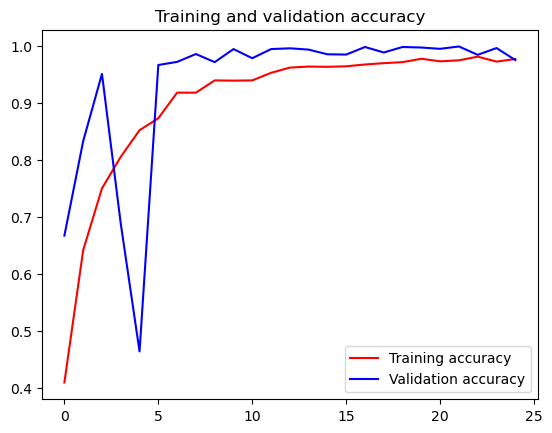

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

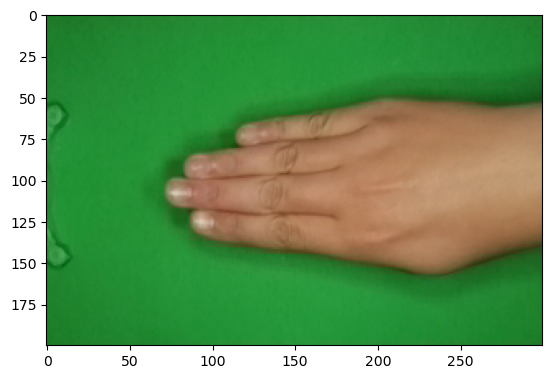

In [21]:
import numpy as np
import tensorflow as tf

from keras.preprocessing import image

path="dataset/rockpaperscissor/rps-cv-images/paper"
fname="0cb6cVL8pkfi4wF6.png"

image_file=path+"\\"+fname
        
img = tf.keras.utils.load_img(image_file)
import matplotlib.pyplot as plt
plt.imshow(img)

In [25]:
import numpy as np
img = tf.keras.utils.load_img(image_file, target_size=(150, 150))
x = img
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
label_list = ['Rock', 'Paper', 'Scissors']
classes = model.predict(images, batch_size=10)
print(fname)
print(classes)
print(label_list[np.argmax(label_list)])

1/1 [==============================] - 1s 989ms/step
0cb6cVL8pkfi4wF6.png
[[1. 0. 0.]]
Scissors
